# Predictive Modeling Project

## Introduction 

Our dataset contains data on cars, including various details about a particular car, and the price of each particular car. [Click here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01) to view the data. 

The purpose of this project is to determine the factors that have the greatest impact on the price of a car, and to build and train a model to predict prices for cars with certain specifications. 

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="#set_up_our_environment">Setting Up Our Environment</a></li>
    <li><a href="#import_the_data">Import the Data</a></li>
    <li><a href="#data_wrangling">Data Wrangling</a></li>
    <li><a href="#data_analysis">Data Analysis</a></li>
        <ul>
            <li><a href="#eda">Phase 1: Exploratory Data Analysis</a></li>
            <li><a href="#model_building">Phase 2: Model Development and Evaluation</a></li>
        </ul>
    <li><a href="#conclusion">Conclusion</a></li>
</ul>

</div>

<hr>

<h2> <a id="set_up_our_environment" >Set Up Our Environment</a></h2>

Loading all of the necessary libraries for this project. 

In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

<h2> <a id="import_the_data" >Import the Data</a></h2>

Import the data contained in a csv file into a pandas dataframe.

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv('auto.csv', names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h2> <a id="data_wrangling" >Data Wrangling</a> </h2>

In order to clean the data, we need to do the following things: 
1. Remove duplicates
2. Identify and handle missing data
3. Correct data formats


We can then export the clean data to a csv file, so that we can refer to it easily in other projects. 

### 1. Remove duplicates

Let's find out if there are any duplicates in the dataframe.

In [6]:
print(df.shape)
df.duplicated().sum()

(205, 26)


0

From this, we can see that there are **no duplicate entries** contained within our dataframe.

### 2. Identify and handle missing data

We need to first replace '?' with np.nan so that it's easy to deal with missing values in the dataset. 



In [5]:
df.replace('?',np.nan, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Now, let's find the columns with missing values. 

In [9]:
missing_df = df.isnull()

for column in missing_df.columns.values.tolist():
    print(column)
    print(missing_df[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

These are 7 columns that have missing values that we need to deal with. Here's how we will handle the missing values: 

Replace missing values with the mean: 
* normalized-losses: 41 missing values
* bore: 4 missing values
* stroke: 4 missing values 
* horsepower: 2 missing values  
* peak-rpm: 2 missing values

Replace missing values with the mode: 
* num-of-doors: 2 missing values


Drop the entire row: 
* price: 4 missing values
    * We need to drop this row because this is what we want to predict using the other variables. 
    * Data entries without price cannot be used for prediction.

#### Replace missing values with the mean

In [20]:
#normalized-losses
avg_norm_loss = df['normalized-losses'].astype('float').mean(axis = 0)
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace = True)

#bore
avg_bore = df['bore'].astype('float').mean(axis = 0)
df['bore'].replace(np.nan, avg_bore, inplace = True)

#stroke
avg_stroke = df['stroke'].astype('float').mean(axis = 0)
df['stroke'].replace(np.nan, avg_stroke, inplace = True)

#horsepower
avg_horsepower = df['horsepower'].astype('float').mean(axis = 0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace = True)

#peak-rpm
avg_peak_rpm = df['peak-rpm'].astype('float').mean(axis = 0)
df['peak-rpm'].replace(np.nan, avg_peak_rpm, inplace = True)

#### Replace missing values with mode

In [21]:
mode_num_doors = df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].replace(np.nan, mode_num_doors, inplace = True)

#### Drop entire rows 

In [23]:
df.dropna(subset=['price'],axis = 0, inplace = True)
df.reset_index(drop=True, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 3. Correct Data Formats

We need to ensure that each column is of the right data type in order to perform our analysis correctly. 

Let's check our data types: 

In [25]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Let's correct the following data types: 
1. normalized-losses: change to **int**
1. bore: change to **float**
2. stroke: change to **float**
3. horsepower: change to **float**
4. peak-rpm: change to **float**

In [26]:
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["price"]] = df[["price"]].astype("float")
df[["horsepower","peak-rpm"]] = df[["horsepower","peak-rpm"]].astype("float")

Let's check our work.

In [27]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

We can now export our clean dataset, in case we need to use the same data in another project. 

In [29]:
df.to_csv('clean_auto_data.csv')

<h2><a id="data_analysis" >Data Analysis</a></h2>

This project will consist of two phases of data analysis: 
1. Exploratory Data Analysis
2. Model Development and Evaluation

Let's start with data exploration. 

<h3><a id="eda" >Phase 1: Exploratory Data Analysis</a></h3>


In this phase, we will perform these tasks: 
1. Descriptive statistical analysis
2. Finding correlation between the numeric variables and price
3. View the relationship between the categorical variables and price

This will help us determine which variables will be important to include when building our regression model. 

#### 1. Descriptive Statistical Analysis
Let's compute basic statistics for our variables.

In [31]:
#numeric variables
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [32]:
#categorical variables
df.describe(include=['object'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,115,94,118,198,145,157,92


#### 2. Finding Correlation - Numeric Variables

Let's find the correlation to see which variables have the strongest relationship with price.

In [52]:
df.corr().loc[:,'price'].to_frame().sort_values(by='price')

,price
highway-mpg,-0.704692
city-mpg,-0.686571
peak-rpm,-0.101616
symboling,-0.082391
compression-ratio,0.071107
stroke,0.082269
normalized-losses,0.133999
height,0.135486
bore,0.543155
wheel-base,0.584642


These are the variables that have a strong correlation *( >0.7 or <-0.7 )* with price, from the strongest correlation to the weakest: 
1. engine-size
2. curb-weight
3. horsepower
4. width
5. highway-mpg 

Let's calculate the p-values to test if the correlation is stastistically significant.

In [53]:
from scipy import stats

In [118]:
#find all of the pearson's correlation coefficients, and their corresponding p-values. 
engine_corr, engine_pvalue = stats.pearsonr(df['engine-size'], df['price'])
curb_corr, curb_pvalue = stats.pearsonr(df['curb-weight'], df['price'])
horsepower_corr, horsepower_pvalue = stats.pearsonr(df['horsepower'], df['price'])
width_corr, width_pvalue = stats.pearsonr(df['width'], df['price'])
highway_corr, highway_pvalue = stats.pearsonr(df['highway-mpg'], df['price'])


print('engine-size: ','\nCorrelation: ',engine_corr,'\nP-value:',engine_pvalue,'\n')
print('curb-weight: ','\nCorrelation: ',curb_corr,'\nP-value:',curb_pvalue,'\n')
print('horsepower: ','\nCorrelation: ',horsepower_corr,'\nP-value:',horsepower_pvalue,'\n')
print('width: ','\nCorrelation: ',width_corr,'\nP-value:',width_pvalue,'\n')
print('highway-mpg: ','\nCorrelation: ',highway_corr,'\nP-value:',highway_pvalue,'\n')

engine-size:  
Correlation:  0.8723351674455185 
P-value: 9.265491622198389e-64 

curb-weight:  
Correlation:  0.8344145257702846 
P-value: 2.1895772388936914e-53 

horsepower:  
Correlation:  0.809574567003656 
P-value: 6.369057428259557e-48 

width:  
Correlation:  0.7512653440522672 
P-value: 9.20033551048217e-38 

highway-mpg:  
Correlation:  -0.7046922650589529 
P-value: 1.7495471144477352e-31 



The correlation between each of these 5 variables and price is statistically significant. We can consider them when building our regression model. 

#### 3. Finding Correlation - Categorical Variables

Let's view the relationships visually using box plots to see if there's a significant relationship between price and these categorical variables: 

* make
* fuel-type
* aspiration
* num-of-doors
* body-style
* drive-wheels
* engine-location
* engine-type
* num-of-cylinders
* fuel-system

<AxesSubplot:xlabel='make', ylabel='price'>

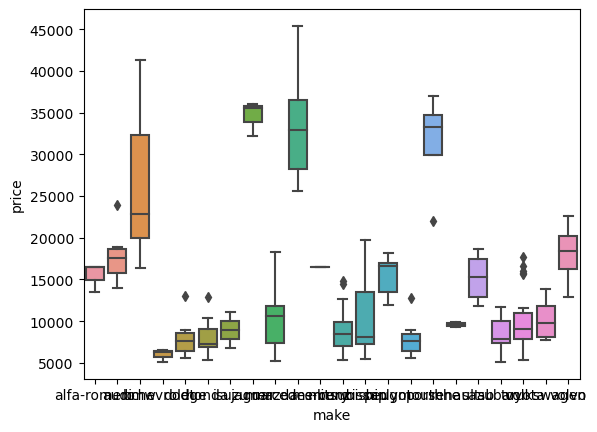

In [61]:
sns.boxplot(x="make", y="price", data=df)

<AxesSubplot:xlabel='fuel-type', ylabel='price'>

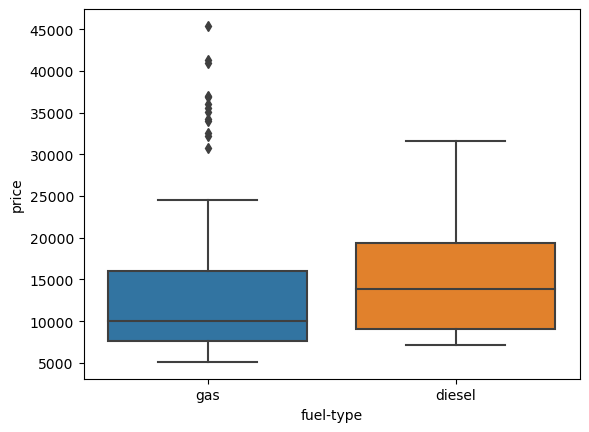

In [62]:
sns.boxplot(x="fuel-type", y="price", data=df)

<AxesSubplot:xlabel='aspiration', ylabel='price'>

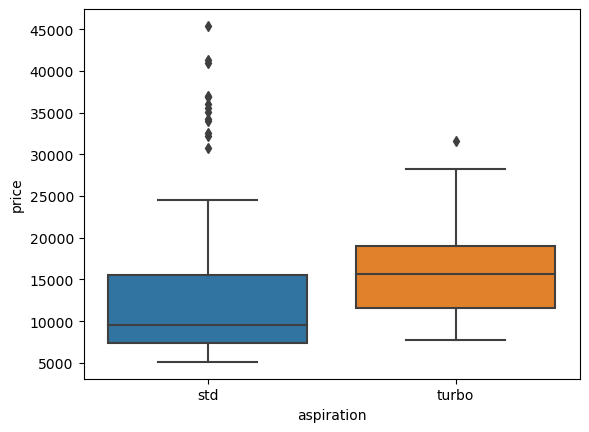

In [63]:
sns.boxplot(x="aspiration", y="price", data=df)

<AxesSubplot:xlabel='num-of-doors', ylabel='price'>

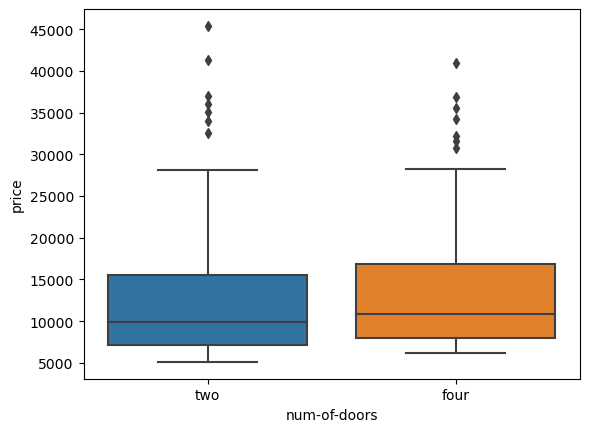

In [64]:
sns.boxplot(x="num-of-doors", y="price", data=df)

<AxesSubplot:xlabel='body-style', ylabel='price'>

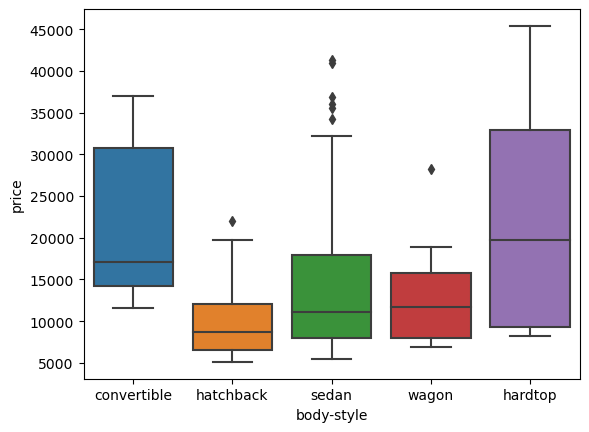

In [65]:
sns.boxplot(x="body-style", y="price", data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

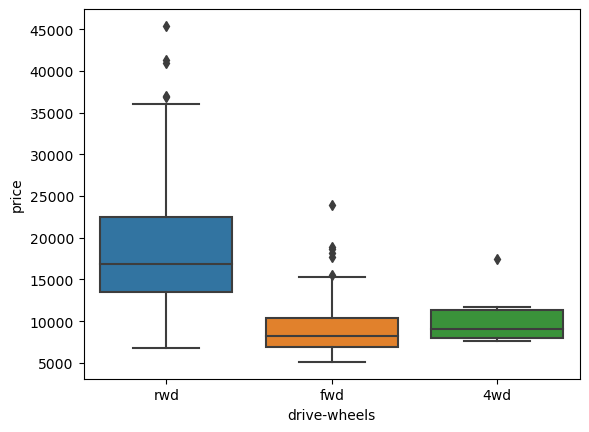

In [66]:
sns.boxplot(x="drive-wheels", y="price", data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

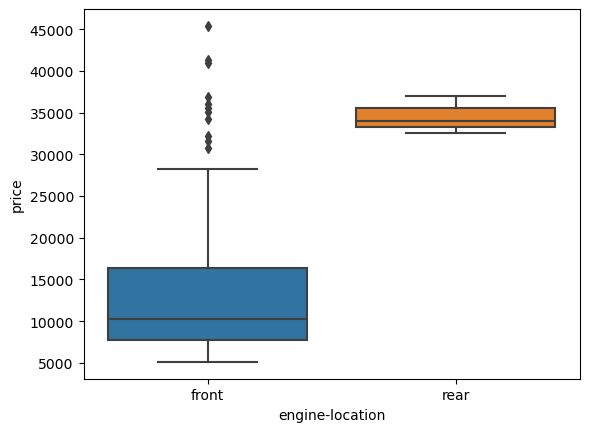

In [60]:
sns.boxplot(x="engine-location", y="price", data=df)

<AxesSubplot:xlabel='engine-type', ylabel='price'>

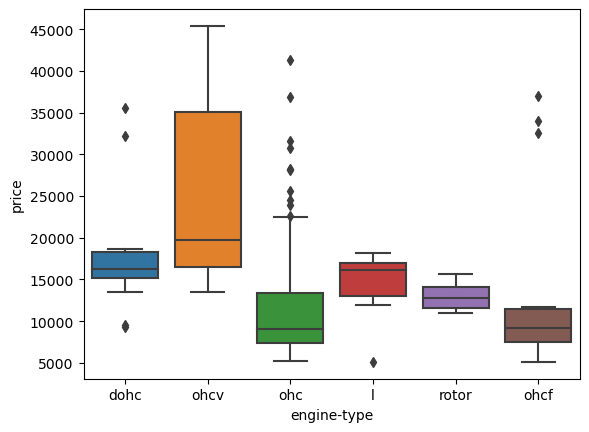

In [67]:
sns.boxplot(x="engine-type", y="price", data=df)

<AxesSubplot:xlabel='num-of-cylinders', ylabel='price'>

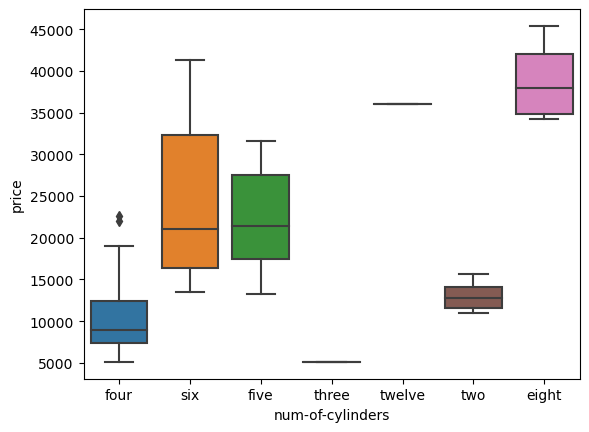

In [68]:
sns.boxplot(x="num-of-cylinders", y="price", data=df)

<AxesSubplot:xlabel='fuel-system', ylabel='price'>

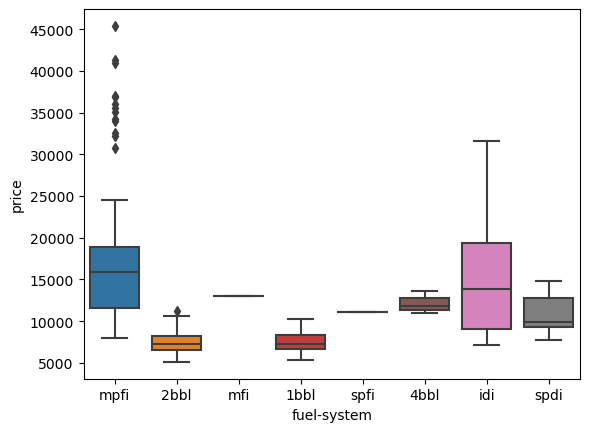

In [69]:
sns.boxplot(x="fuel-system", y="price", data=df)


Most of the categorical variables have too much of an overlap in the boxplots for it to be a helpful variable for our regression model. 

Let's use ANOVA to test the significance of the correlation between price and these variables: 
* drive-wheels
* engine-location

In [88]:
drive_test = df[['drive-wheels','price']].groupby(['drive-wheels'])
engine_test = df[['engine-location','price']].groupby(['engine-location'])

Let's also obtain the unique entries for both variables.

In [92]:
drive_test['drive-wheels'].unique()

drive-wheels
4wd    [4wd]
fwd    [fwd]
rwd    [rwd]
Name: drive-wheels, dtype: object

In [93]:
engine_test['engine-location'].unique()

engine-location
front    [front]
rear      [rear]
Name: engine-location, dtype: object

Now we can obtain the ANOVA results.

In [102]:
drive_fvalue, drive_pvalue = stats.f_oneway(drive_test.get_group('4wd')['price'], drive_test.get_group('fwd')['price'], drive_test.get_group('rwd')['price'])
engine_fvalue, engine_pvalue = stats.f_oneway(engine_test.get_group('front')['price'], engine_test.get_group('rear')['price'])

print('Drive-wheels ANOVA results: ','\nF-value: ',drive_fvalue,'\nP-value: ',drive_pvalue,'\n')
print('Engine-location ANOVA results: ','\nF-value: ',engine_fvalue,'\nP-value: ',engine_pvalue)


Drive-wheels ANOVA results:  
F-value:  67.95406500780399 
P-value:  3.3945443577151245e-23 

Engine-location ANOVA results:  
F-value:  24.495550318865693 
P-value:  1.583490019777699e-06


Both variables are statistically significant. But we need to see which categories within drive-wheels we should use for one hot encoding. 

In [101]:
#4wd and fwd
fvalue_1, pvalue_1 = stats.f_oneway(drive_test.get_group('4wd')['price'], drive_test.get_group('fwd')['price'])

#4wd and rwd
fvalue_2, pvalue_2 = stats.f_oneway(drive_test.get_group('4wd')['price'], drive_test.get_group('rwd')['price'])

#fwd and rwd
fvalue_3, pvalue_3 = stats.f_oneway(drive_test.get_group('fwd')['price'], drive_test.get_group('rwd')['price'])

print('4wd and fwd: ', '\nF-value: ', fvalue_1, '\nP-value: ', pvalue_1,'\n')
print('4wd and rwd: ', '\nF-value: ', fvalue_2, '\nP-value: ', pvalue_2,'\n')
print('fwd and rwd: ', '\nF-value: ', fvalue_3, '\nP-value: ', pvalue_3,'\n')

4wd and fwd:  
F-value:  0.665465750252303 
P-value:  0.41620116697845666 

4wd and rwd:  
F-value:  8.580681368924756 
P-value:  0.004411492211225333 

fwd and rwd:  
F-value:  130.5533160959111 
P-value:  2.2355306355677845e-23 



We can use the **fwd** and **rwd** categories for one hot encoding for the drive-wheel variable, as the difference between the two is statistically significant.

Let's transform our two categorical variables by obtaining dummy variables.  

In [112]:
#drive-wheels
drive_dummy_var = pd.get_dummies(df['drive-wheels'])
drive_dummy_var.drop('4wd', axis = 1, inplace = True)
drive_dummy_var.rename(columns = {'fwd':'drive-wheels-fwd','rwd':'drive-wheels-rwd'}, inplace=True)


#engine-location
engine_dummy_var = pd.get_dummies(df['engine-location'])
engine_dummy_var.rename(columns = {'front':'engine-location-front','rear':'engine-location-rear'},inplace=True)

In [113]:
drive_dummy_var.head(), engine_dummy_var.head()

(   drive-wheels-fwd  drive-wheels-rwd
 0                 0                 1
 1                 0                 1
 2                 0                 1
 3                 1                 0
 4                 0                 0,
    engine-location-front  engine-location-rear
 0                      1                     0
 1                      1                     0
 2                      1                     0
 3                      1                     0
 4                      1                     0)

Let's add these dummy variables to our original dataframe. 

In [114]:
df = pd.concat([df, drive_dummy_var, engine_dummy_var], axis = 1)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,drive-wheels-fwd,drive-wheels-rwd,engine-location-front,engine-location-rear
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,0,1,1,0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,0,1,1,0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,0,1,1,0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,1,0,1,0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450.0,0,0,1,0


Now our dataset is ready to for our regression analysis. 

<h3> <a id="model_building" >Phase 2: Model Development and Evaluation</a></h3>

To recap, these were the variables that we found to be statistically significant: 

Numeric Variables
1. engine-size
2. curb-weight
3. horsepower
4. width
5. highway-mpg 

Categorical Variables
1. drive-wheels (fwd and rwd categories)
2. engine-location (front and rear categories)

#### Selecting our variables
Let's first check for multi-collinearity between the variables.

In [120]:
df_model = df[['engine-size','curb-weight','horsepower','width','highway-mpg','drive-wheels-fwd', 
               'drive-wheels-rwd', 'engine-location-front','engine-location-rear','price']]
corr = df_model.corr()
corr.style.background_gradient(cmap='coolwarm')

,engine-size,curb-weight,horsepower,width,highway-mpg,drive-wheels-fwd,drive-wheels-rwd,engine-location-front,engine-location-rear,price
engine-size,1.000000,0.849072,0.822676,0.729436,-0.679571,-0.511364,0.559063,-0.199367,0.199367,0.872335
curb-weight,0.849072,1.000000,0.757976,0.866201,-0.794889,-0.658408,0.670611,-0.051287,0.051287,0.834415
horsepower,0.822676,0.757976,1.000000,0.615077,-0.804575,-0.539040,0.584433,-0.342117,0.342117,0.809575
width,0.729436,0.866201,0.615077,1.000000,-0.680635,-0.458939,0.507028,0.052205,-0.052205,0.751265
highway-mpg,-0.679571,-0.794889,-0.804575,-0.680635,1.000000,0.594527,-0.571216,0.102964,-0.102964,-0.704692
drive-wheels-fwd,-0.511364,-0.658408,-0.539040,-0.458939,0.594527,1.000000,-0.919914,0.146768,-0.146768,-0.595979
drive-wheels-rwd,0.559063,0.670611,0.584433,0.507028,-0.571216,-0.919914,1.000000,-0.159545,0.159545,0.637522
engine-location-front,-0.199367,-0.051287,-0.342117,0.052205,0.102964,0.146768,-0.159545,1.000000,-1.000000,-0.331062
engine-location-rear,0.199367,0.051287,0.342117,-0.052205,-0.102964,-0.146768,0.159545,-1.000000,1.000000,0.331062
price,0.872335,0.834415,0.809575,0.751265,-0.704692,-0.595979,0.637522,-0.331062,0.331062,1.000000


As we can see from the correlation, we actually don't need to include drive-wheels and engine-location anymore as they are not very highly correlated with the price after one hot encoding. Let's remove those two and check the multi-collinearity again. 

In [121]:
df_model = df[['engine-size','curb-weight','horsepower','width','highway-mpg','price']]
corr = df_model.corr()
corr.style.background_gradient(cmap='coolwarm')

,engine-size,curb-weight,horsepower,width,highway-mpg,price
engine-size,1.000000,0.849072,0.822676,0.729436,-0.679571,0.872335
curb-weight,0.849072,1.000000,0.757976,0.866201,-0.794889,0.834415
horsepower,0.822676,0.757976,1.000000,0.615077,-0.804575,0.809575
width,0.729436,0.866201,0.615077,1.000000,-0.680635,0.751265
highway-mpg,-0.679571,-0.794889,-0.804575,-0.680635,1.000000,-0.704692
price,0.872335,0.834415,0.809575,0.751265,-0.704692,1.000000


Let's also compute the Variance Inflation Factor(VIF) to get more information on the multi-collinearity. 

In [123]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_model_noprice = df[['engine-size','curb-weight','horsepower','width','highway-mpg']]

vif = pd.DataFrame()
vif["features"] = df_model_noprice.columns
vif["vif_Factor"] = [variance_inflation_factor(df_model_noprice.values, i) for i in range(df_model_noprice.shape[1])]
vif

,features,vif_Factor
0,engine-size,55.814128
1,curb-weight,184.185154
2,horsepower,39.817689
3,width,370.454528
4,highway-mpg,78.318877


Let's try and remove some variables to reduce the collinearity. 

We need to keep engine-size and curb-weight as they are most highly correlated with price. So we should observe how removing horsepower, width, and highway-mpg (one at a time) impacts our VIF. 

#### VIF without highway-mpg

In [124]:
df_model_noprice = df[['engine-size','curb-weight','horsepower','width']]
                       
vif = pd.DataFrame()
vif["features"] = df_model_noprice.columns
vif["vif_Factor"] = [variance_inflation_factor(df_model_noprice.values, i) for i in range(df_model_noprice.shape[1])]
vif

,features,vif_Factor
0,engine-size,50.727300
1,curb-weight,110.067638
2,horsepower,28.070134
3,width,40.579772


#### VIF without width

In [125]:
df_model_noprice = df[['engine-size','curb-weight','horsepower','highway-mpg']]
                       
vif = pd.DataFrame()
vif["features"] = df_model_noprice.columns
vif["vif_Factor"] = [variance_inflation_factor(df_model_noprice.values, i) for i in range(df_model_noprice.shape[1])]
vif

,features,vif_Factor
0,engine-size,47.936409
1,curb-weight,62.580062
2,horsepower,30.386515
3,highway-mpg,8.579089


#### VIF without horsepower

In [126]:
df_model_noprice = df[['engine-size','curb-weight','highway-mpg','width']]
                       
vif = pd.DataFrame()
vif["features"] = df_model_noprice.columns
vif["vif_Factor"] = [variance_inflation_factor(df_model_noprice.values, i) for i in range(df_model_noprice.shape[1])]
vif

,features,vif_Factor
0,engine-size,37.186381
1,curb-weight,175.783836
2,highway-mpg,55.212179
3,width,282.709074


Removing width has the greatest impact on the VIF, but our model still has significant multi-collinearity. 
The most important variables for our model are: 

1. engine-size
2. curb-weight
3. horsepower
4. highway-mpg 

Since we are developing a model with multiple variables that deal with multi-collinearity, a **ridge regression** model will be best to help us predict price accurately. 

We can also try to test a **polynomial regression** model to see how well it predicts the price. 

#### Ridge Regression



In [127]:
df_model = df[['engine-size','curb-weight','horsepower','highway-mpg','price']]

#select our independent variables and our dependent variable
y = df_model['price']
x = df_model.drop('price',axis=1)

#split our data into train and test datasets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

Now we can use Grid Search to find the best alpha for our Ridge Regression model. 

In [287]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

#select potential parameters
parameters = [{'alpha':np.linspace(0.001,50000)}]

#create ridge regression object
RR = Ridge()

#create ridge grid search object
Grid = GridSearchCV(RR, parameters, cv=4)

#train the model
Grid.fit(x_train, y_train)

#find the Ridge Regression Model with the best value for alpha
Best_RR = Grid.best_estimator_
Best_RR

Ridge(alpha=14285.715000000002)

Let's now test how good our model is using our test data by finding the R-squared value. 

In [288]:
Best_RR.score(x_test,y_test)

0.7833787906541944

This Ridge regression model predicts **78.3%** of the variation in the price.

Let's plot the distribution of the predicted values vs. the actual values to see how well our Ridge Regression model predicts price. 

First, we will predict new values using our Ridge Regression Model. 

In [132]:
y_hat = Best_RR.predict(x_test)

Now, we can plot the predicted values vs. the actual values. 

In [238]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 6
    height = 4
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend()

    plt.show()
    plt.close()

/Users/Nduta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/Nduta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


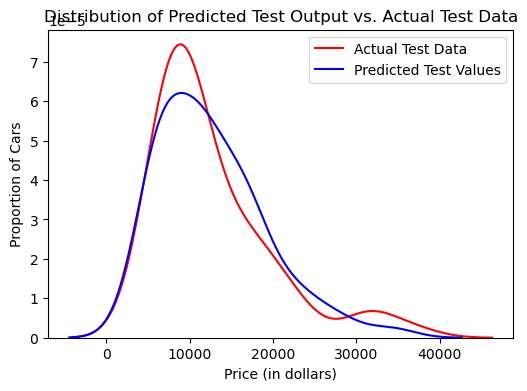

In [239]:
Title = 'Distribution of Predicted Test Output vs. Actual Test Data'
DistributionPlot(y_test, y_hat, "Actual Test Data",'Predicted Test Values', Title)

This is not bad, but let's try and compare this to a ridge regression model with polynomial features of 2 degrees. 

#### Ridge Regression with Polynomial Features

We first want to normalize the data before we use it to train our model. We can use a `Pipeline()` object for this.

In [283]:
from sklearn.pipeline import Pipeline
#set parameters for the Grid Search
parameters2 = [{'alpha':np.linspace(23,24)}]

#set the steps in the pipeline 
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),
         ('mode',Ridge(23.5))]

#Create the Pipeline object with the steps specified above. 
pipe = Pipeline(Input)

#Train the model
pipe.fit(x_train,y_train)


Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('mode', Ridge(alpha=23.5))])

Let's now see how good our model is at predicting the price. 

In [284]:
#get the R-squared score
pipe.score(x_test,y_test)

0.8096400651583092

This Polynomial Ridge regression model predicts about **80.9%** of the variation in the price. This model is a better predictor of price than our other model. 

Let's plot the predicted values vs. the actual values. 

/Users/Nduta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/Nduta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


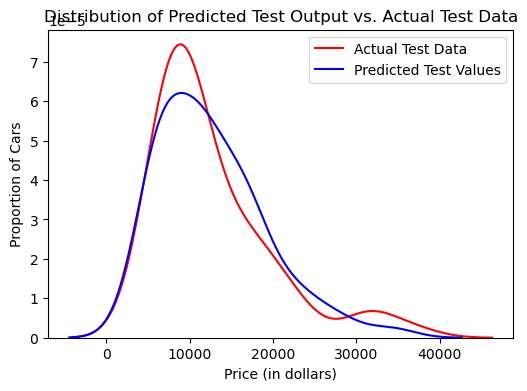

In [285]:
#predicted values
yhat = pipe.predict(x_test)

#plot the graph
Title = 'Distribution of Predicted Test Output vs. Actual Test Data'
DistributionPlot(y_test, y_hat, "Actual Test Data",'Predicted Test Values', Title)

<h2> <a id="conclusion" >Conclusion</a></h2>

The model that best is the best predictor of the price of cars (based on our dataset) is a <u>Ridge Regression model with Polynomial Features of Degree 2.</u> 

Here are the coefficients of our model. 

In [296]:
coef = pd.DataFrame(pipe.named_steps['polynomial'].get_feature_names_out(['engine-size','curb-weight','horsepower','highway-mpg']))
coef['Coefficient Estimate'] = pipe.named_steps['mode'].coef_

coef

,0,Coefficient Estimate
0,1,0.000000
1,engine-size,2110.825677
2,curb-weight,1540.581333
3,horsepower,1824.161096
4,highway-mpg,-1180.750967
5,engine-size^2,424.678258
6,engine-size curb-weight,418.057768
7,engine-size horsepower,-626.718253
8,engine-size highway-mpg,-385.444960
9,curb-weight^2,444.674757


Here is our intercept for our model. 

In [290]:
pipe.named_steps['mode'].intercept_

12201.180241261101

Thank you for taking the time to view my predictive modelling project!